##### Χρηστίδης Μηχάλης 3160192 
##### Σίγας Γεώργιος 3160158
##                 CV Project 2019-2020 

In [ ]:
# import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import math
from matplotlib.patches import Circle

In [2]:
def imageprint(im, h=12):
    y = im.shape[0]
    x = im.shape[1]
    w = (y/x) * h
    plt.figure(figsize=(w,h))
    plt.imshow(im, interpolation="none",cmap = plt.get_cmap('gray'))
    plt.axis('off')

(632, 566, 3)

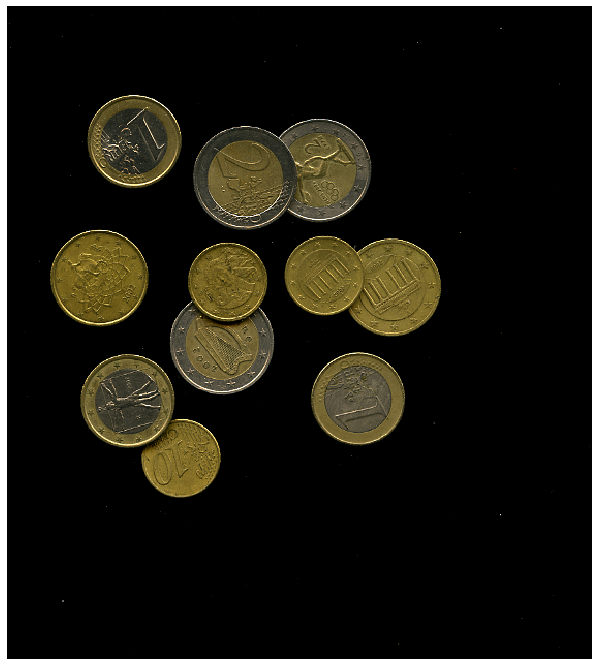

In [3]:
im= plt.imread("/Users/sigas/examples/coins005.tif")
imageprint(im)
im.shape

In [4]:
def to_grayscale(img):
    img1=np.zeros(shape=(img.shape[0],img.shape[1]))
    for x in range (0 ,img.shape[0]):
        for y in range(0,img.shape[1]):
            value=0.2989 * img[x,y,0] + 0.5870 * img[x,y,1] + 0.1140 * img[x,y,2]
            img1[x,y]=value
    return img1

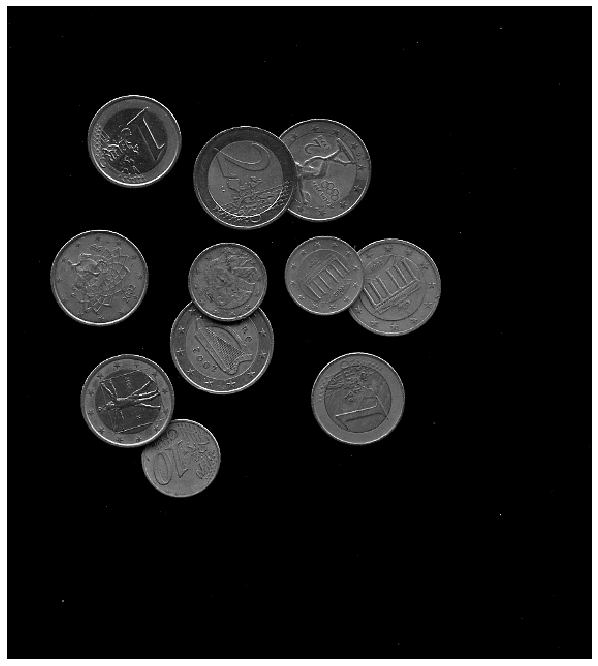

In [5]:
img = to_grayscale(im) #use gray scale on image 

imageprint(img) #print image

In [6]:
def sobelFilter(img):
    img1=np.zeros(shape=(img.shape[0],img.shape[1]))
    for x in range(1, img.shape[0]-1):  # ignore the edge pixels (1 to width-1)
        for y in range(1, img.shape[1]-1): # ignore edge pixels  (1 to height-1)

            # initialise Gx to 0 and Gy to 0 for every pixel
            Gx = 0
            Gy = 0

            # top left pixel
            p = img[x-1, y-1]
            # value into Gx, and Gy
            Gx += -p
            Gy += -p

            # remaining left column
            
            p = img[x-1, y]
            Gx += -2 * p

            
            p = img[x-1, y+1]
            Gx += -p
            Gy += p

            
            # middle pixels
            p = img[x, y-1]
            Gy += -2 * p

           
            p = img[x, y+1]
            Gy += 2 * p

            # right column
            p = img[x+1, y-1]
            Gx += p
            Gy += -p

            
            
            p = img[x+1, y]
            Gx += 2 * p

            
            p = img[x+1, y+1]
            Gx += p
            Gy += p

            # calculate the length of the gradient (Pythagorean theorem)
            val = math.sqrt((Gx * Gx) + (Gy * Gy))


            img1[x,y]=val
    return img1

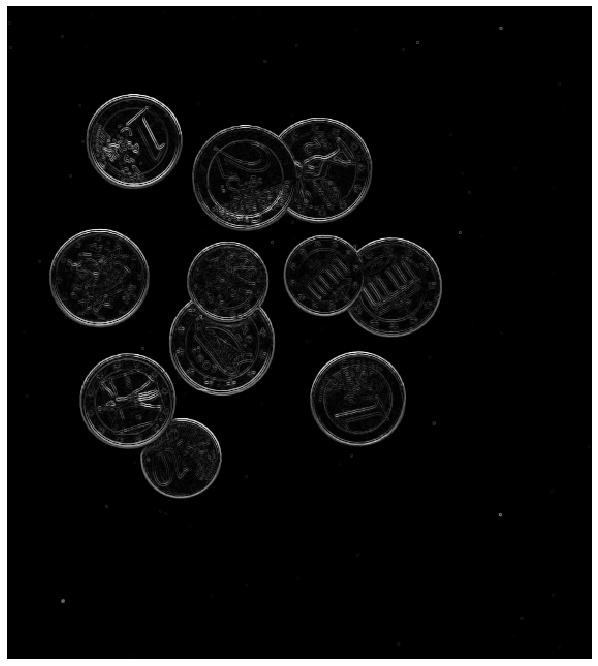

In [7]:
imgSob = sobelFilter(img) #use sobelfilter on grey scale image


imageprint(imgSob) #print image

In [8]:
def HT(img,r):
    numThetas = 360
    
    height=img.shape[0]
    width=img.shape[1]
    Votes=np.zeros((height,width),dtype=int)
    
    THETAS=np.linspace(0, 2*math.pi, numThetas)
    
    for y in range(0 , height):
        for x in range(0, width):
            if (img[y,x]>0.25):
                for vote in range(0, numThetas ):
                    theta=THETAS[vote]
                    
                    a=int(y-r*math.cos(theta))
              
               
                  
                    b=int(x+r*math.sin(theta))
         
                
                    
                    if((a>=0 and a<height) and (b>=0 and b<width)):
                        Votes[a,b]+=1
                     
                    
        
    return Votes
    
    

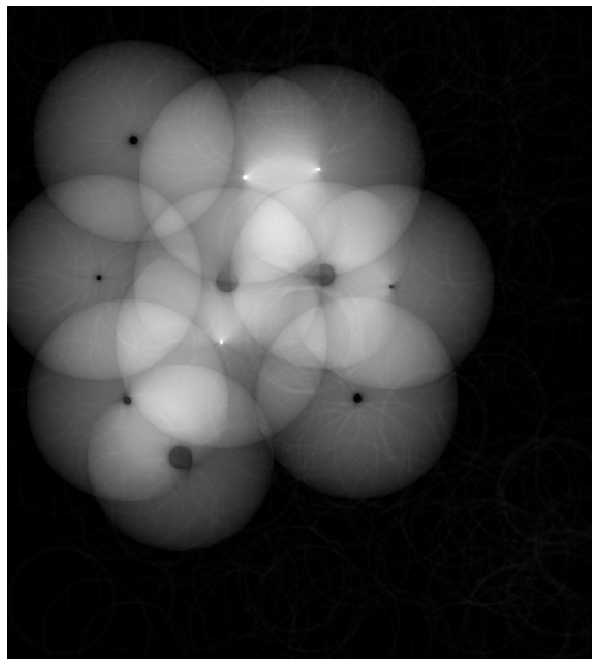

In [9]:
indexes=[]#all the existing circle centers

FinalVotes2e=HT(imgSob,51)

imageprint(FinalVotes2e)

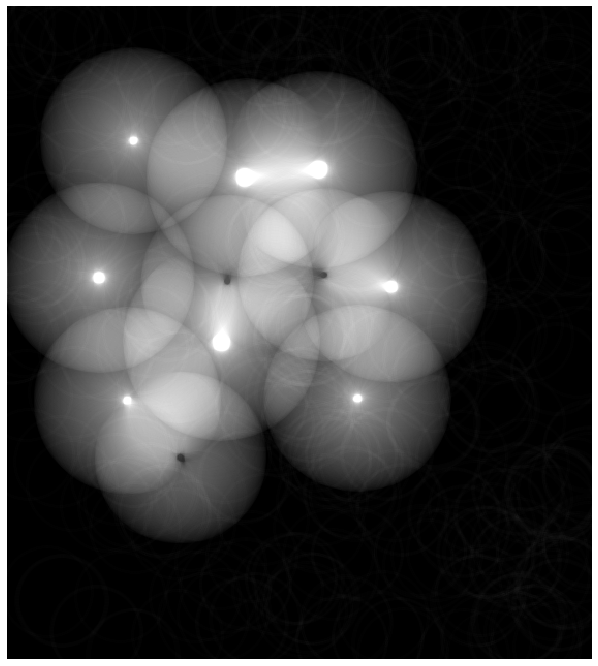

In [10]:
FinalVotes1e=HT(imgSob,43.35)

imageprint(FinalVotes1e)

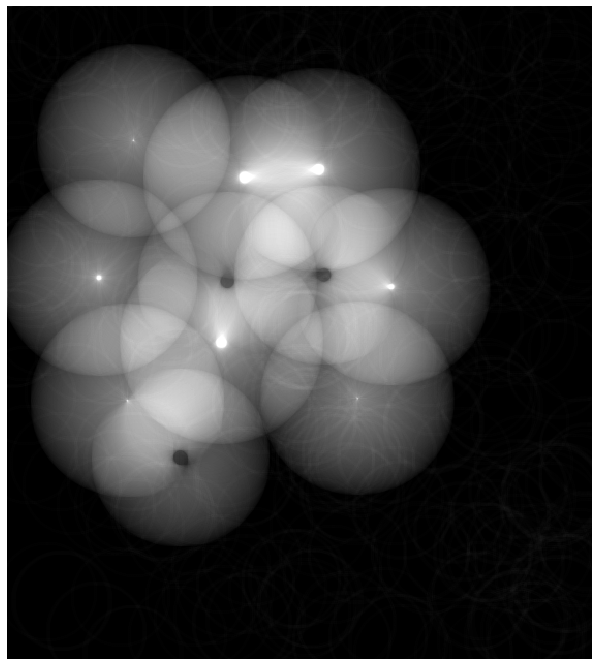

In [11]:
FinalVotes50c=HT(imgSob,46.92)

imageprint(FinalVotes50c)

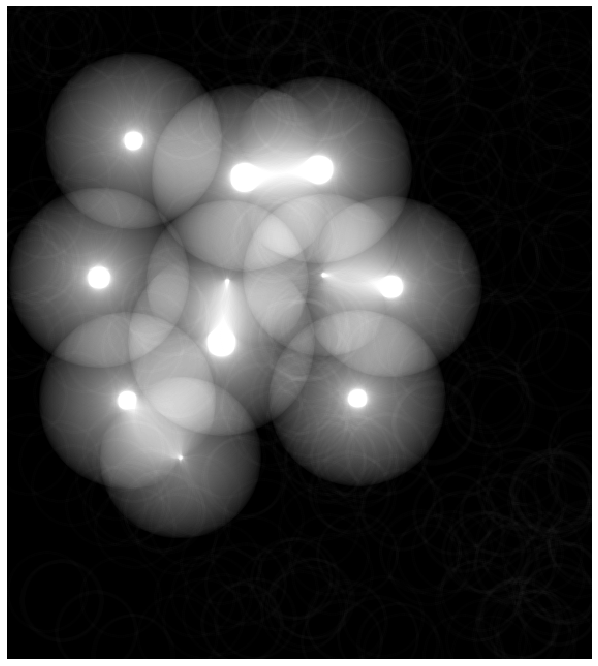

In [12]:
FinalVotes10c=HT(imgSob,38.25)

imageprint(FinalVotes10c)

In [13]:
def CheckDist(x,y):#checks if 2 spots are near and discard them
    global indexes
    if not indexes:
        return True
    for (m,n) in indexes:
        dist=math.sqrt((m - x) ** 2 +(n-y)**2)
        if(dist<=38):
            return False
    return True  
    

In [14]:
def getIndex(FinalVotes):
    global indexes
    max_value = 0
    counter=0
    maxIndex=[]
 
    for m in range(0,FinalVotes.shape[0]):
        for n in range( 0, FinalVotes.shape[1]):
            if max_value < FinalVotes[m,n]:
                max_value = FinalVotes[m,n]


    for m in range(0,FinalVotes.shape[0]):#find all the spots with the most votes
        for n in range( 0, FinalVotes.shape[1]):
            if(max_value==FinalVotes[m,n]):
                if(CheckDist(m,n)):
                    maxIndex.append([m,n])
                    counter+=1
                    indexes.append([m,n])
                else:
                    FinalVotes[m,n]=0  #all th other spots get 0
            else:
                FinalVotes[m,n]=0
    
    imageprint(FinalVotes)
    return maxIndex

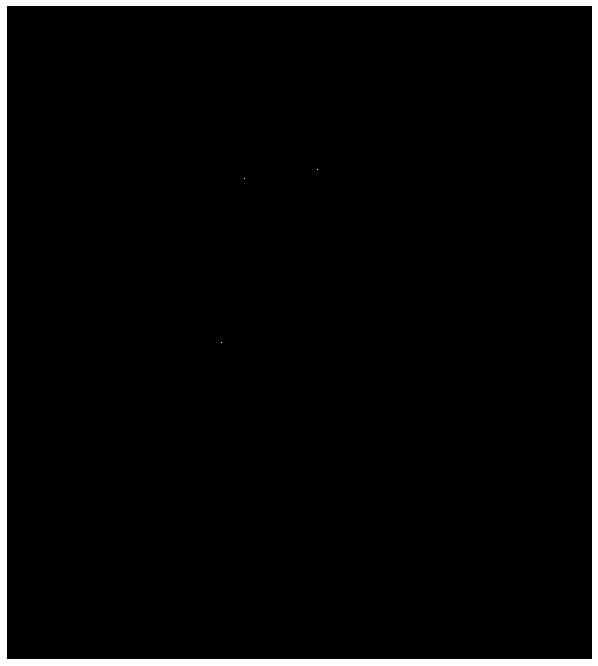

In [15]:
maxIndex2e=getIndex(FinalVotes2e)

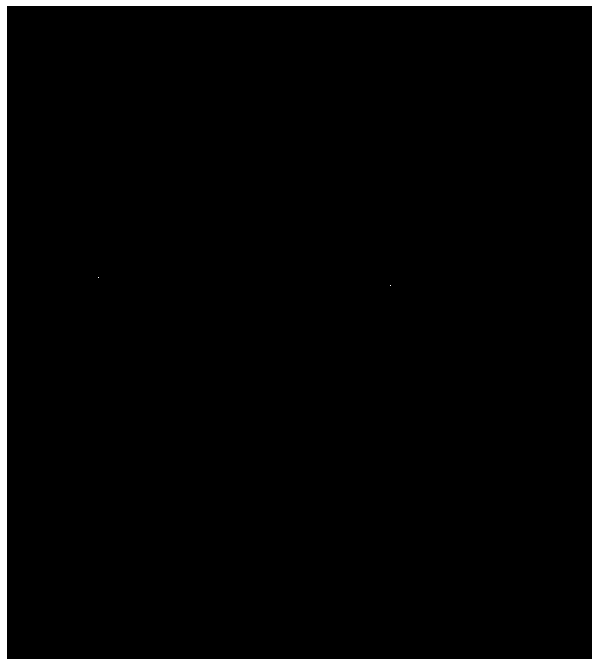

In [16]:
maxIndex50c=getIndex(FinalVotes50c)

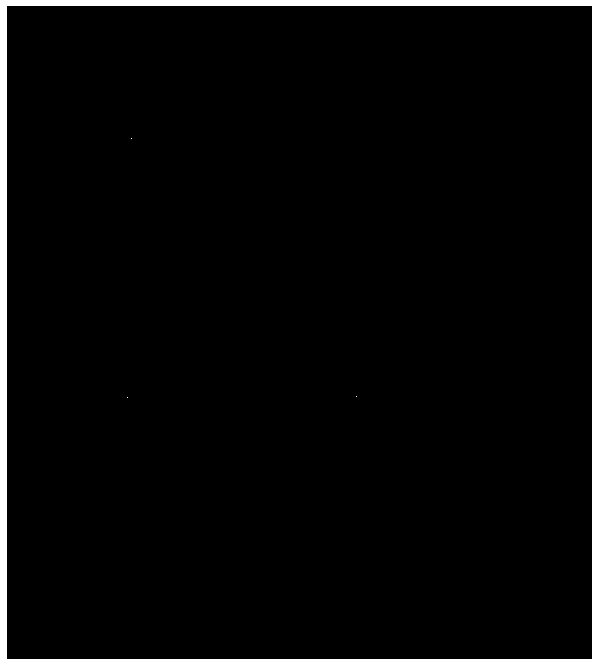

In [17]:
maxIndex1e=getIndex(FinalVotes1e)

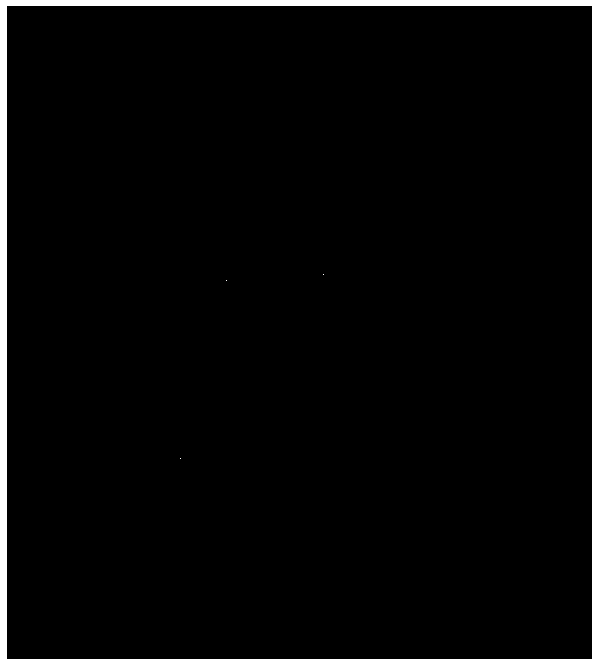

In [18]:
maxIndex10c=getIndex(FinalVotes10c)

In [19]:
def PrintRes(im,maxIndex2e,maxIndex1e,maxIndex50c,maxIndex10c):
    y = im.shape[0]
    x = im.shape[1]
    w = (y/x) * 12
    fig,ax = plt.subplots(1,figsize=(w,12))
    ax.set_aspect('equal')

    ax.axis('off')

    ax.imshow(im)
    
    #plot all circles 
    for x in maxIndex2e:

        circ=Circle((x[1],x[0]),51, fill=False ,color='red' ,linewidth=5)
        ax.add_patch(circ)
    print('There are ',len(maxIndex2e),' 2-Euro coins in the image')
    
    for x in maxIndex1e:

        circ=Circle((x[1],x[0]),43.35,fill=False , color='blue' ,linewidth=5)
        ax.add_patch(circ)
    print('There are ',len(maxIndex1e),' 1-Euro coins in the image')
    
    for x in maxIndex50c:

        circ=Circle((x[1],x[0]),46.92,fill=False ,color='green',linewidth=5)
        ax.add_patch(circ)
    print('There are ',len(maxIndex50c),' 50-cent coins in the image')    
    
    for x in maxIndex10c:

        circ=Circle((x[1],x[0]),38.25,fill=False,color='pink',linewidth=5)
        ax.add_patch(circ)
    print('There are ',len(maxIndex10c),' 10-cent coins in the image')
 
    plt.show()
   


There are  3  2-Euro coins in the image
There are  3  1-Euro coins in the image
There are  2  50-cent coins in the image
There are  3  10-cent coins in the image


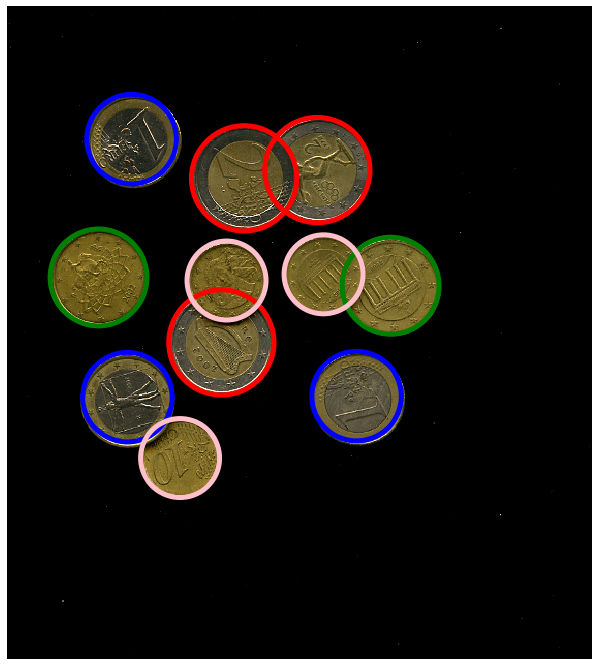

In [20]:
PrintRes(im,maxIndex2e,maxIndex1e,maxIndex50c,maxIndex10c)